In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import seaborn as sns

import mne
from scipy.io import loadmat, savemat
from scipy.stats import ttest_rel, ttest_1samp, ttest_ind, kstest, wilcoxon
from statannotations.Annotator import Annotator
from statsmodels.stats.multitest import fdrcorrection

import glob
import os

import pickle
import sys

sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *


In [2]:
#load subjects
good_listen_subjects, good_motor_subjects, musicians, nonmusicians = load_subject_lists()
subjects_to_process = good_motor_subjects
task = 'listen'

#load channels
ch_names_64, _ = load_channels()

#load standard mne info (used for channel positions)
with open('../utils/epochs_info.pkl', 'rb') as file:
    epochs_info = pickle.load(file)

In [3]:
#load data
epochs_df = load_epochs_bysubject(subjects_to_process, task=task)

Processing subject:  01
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  03
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_03.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Pia

0 projection items activated
Processing subject:  04
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_04.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_04.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  05
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_05.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF co

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_04.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_04.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Pia

Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_06.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  07
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_07.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_07.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_06.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_07.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Pia

Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_08.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  09
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_09.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_09.fif ...
    Found the data of interest:
  

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_08.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_09.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Pia

0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_11.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  12
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_12.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_12.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices ava

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_11.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_12.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Pia

Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_13.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  14
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_14.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_14.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_13.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_14.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Pia

        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_16.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  17
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_17.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_lis

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_16.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_17.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Pia

        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_19.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  20
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_20.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_lis

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_19.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_20.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:375: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Pia

In [4]:
#epochs_df.to_csv('epochs_df.csv')

In [21]:
epochs_pre_listen_mus, evokeds_pre_listen_mus, epochs_post_listen_mus, evokeds_post_listen_mus = load_evoked_epochs([x for x in good_motor_subjects if x in musicians], 'motor')


Processing subject:  06
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_06.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 357 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_06.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
357 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_06.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:320: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_06.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:322: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_06.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:328: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EE

No baseline correction applied
0 projection items activated
Processing subject:  12
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_12.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 287 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_12.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
287 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_12.fif ...
    Found the 

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:320: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_12.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:322: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_12.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:328: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EE

    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
338 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_14.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (6)
        0 CTF compensation matrices available
        nave = 313 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_14.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
313 matching events found
No baseline correction applied
0 projection items

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:328: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_14.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_post = mne.read_evokeds(file_evokeds_post)[0]
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:330: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_14.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_post = mne.read_epochs(file_epochs_post)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:320: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano

    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
425 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  18
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_18.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (6)
        0 CTF compensation matrices available
        nave = 314 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_18.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
314 matching events found
No baseline correction appl

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:320: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_18.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:322: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_18.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:328: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EE

Not setting metadata
2713 matching events found
Applying baseline correction (mode: mean)


In [22]:
ep_toplot = epochs_pre_listen_mus.get_data()

In [23]:
ep_toplot_ave = np.mean(ep_toplot, axis = 0)[:64]

In [18]:
erp_times = load_erp_times()

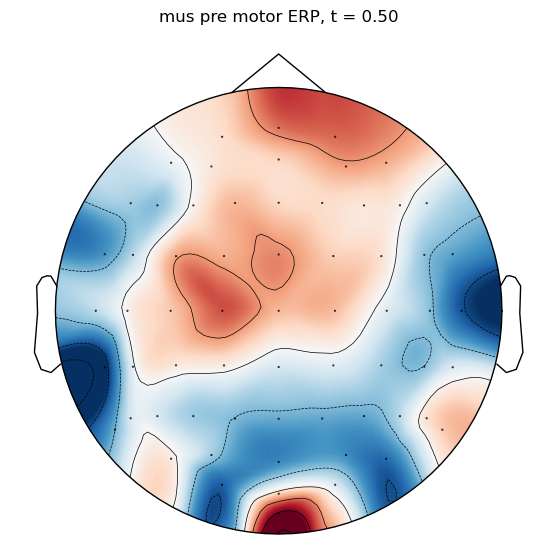

In [24]:
#plotting ERP
timepoints = np.arange(0, 91)
# Set up the figure and axes for the animation
fig, axes = plt.subplots(figsize=(8, 6))
axes.set_title(f'mus pre motor ERP')

# Function to update the topomap for each frame
def update(frame):
    axes.clear()  # Clear the axes for the new frame
    axes.set_title(f'mus pre motor ERP, t = {erp_times[frame]:.2f}')  # Update title
    im, cn = mne.viz.plot_topomap(ep_toplot_ave[:, frame], 
                                   pos=epochs_post_listen_mus.info, 
                                   size=1, 
                                   axes=axes, 
                                   #vlim=(0.95, 1), 
                                   show=False)  # Prevent showing during animation
    return im,

# Create animation
ani = FuncAnimation(fig, update, frames=timepoints, blit=False, repeat=True)

# Save the animation as an MP4 file
ani.save(f'mus_pre_motor.mp4', writer='ffmpeg', fps=10)

# Show the animation (optional)
plt.show()

## Computing symmetry across hemispheres
(hypothesis: listening ERP becomes more left-lateralized after training)

In [474]:
#defining left and right hemisphere channels
ch_left = ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1']
ch_left_idx = ch_index(ch_left)

ch_right = ['Fp2', 'AF8', 'AF4', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
ch_right_idx = ch_index(ch_right)

ch_center = ['Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'AFz', 'Fz', 'FCz', 'Cz']
ch_center_idx = ch_index(ch_center)

In [475]:
#calculating differences

def subtract_hemispheres(epochs):
    """ 
    Subtracts one hemisphere from the other
    Epochs: an array of n_channels x n_timepoints. 
    ---
    Returns: an array of n_channels x n_timepoints. 
    """
    epochs_sym = epochs.copy()
    epochs_sym[ch_left_idx] = epochs_sym[ch_left_idx] - epochs_sym[ch_right_idx]
    return epochs_sym

def find_lat_diff(epochs_sym):
    """ 
    Turns all values in center and right hemisphere into 0
    epochs_sym: column of values where the right side is already subtracted from left side
    """
    epochs_diff = epochs_sym.copy()
    epochs_diff[ch_right_idx] = 0
    epochs_diff[ch_center_idx] = 0 
    return epochs_diff


#subtract right hemisphere electrodes from corresponding ones in left hemisphere (center ones untouched)
epochs_df['epochs_sym'] = epochs_df['epochs'].apply(subtract_hemispheres)
epochs_df['epochs_diff'] = epochs_df['epochs_sym'].apply(find_lat_diff)

(64, 91)
(64, 91)
(64, 91)
(64, 91)


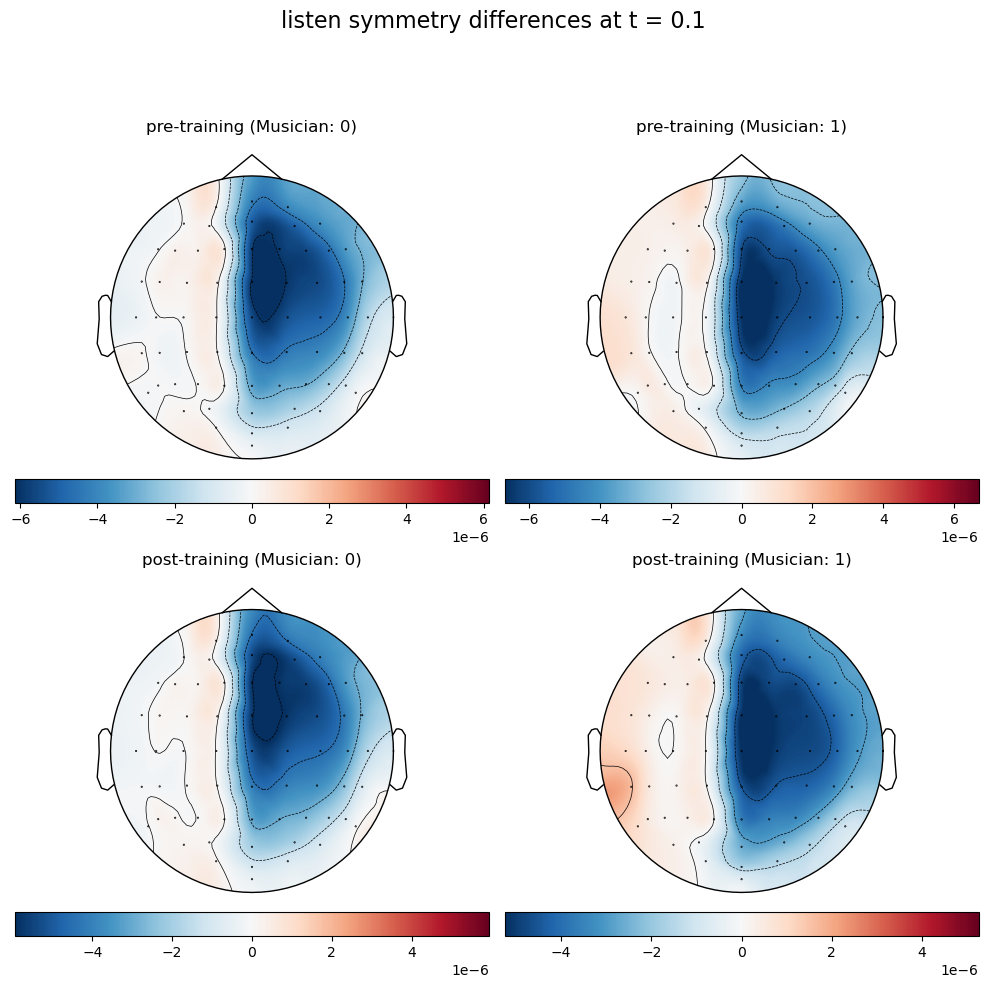

In [476]:
#plotting differences in symmetry where the right side has the original values


# Parameters
timepoint = 0.1

time_toplot = time_index([timepoint])

# Create a figure with subplots (2 rows and 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Adjust the size as necessary
fig.suptitle(f'{task} symmetry differences at t = {timepoint}', fontsize=16)

# Loop through periods and musicians
for i, (period, musician) in enumerate([(p, m) for p in ['pre', 'post'] for m in [0, 1]]):
    ep_sym_ave = np.mean(epochs_df[(epochs_df['period'] == period) & (epochs_df['musician'] == musician)]['epochs_sym'])
    print(ep_sym_ave.shape)
    # Check if ep_sym_ave is not empty and has the expected shape
    #if ep_sym_ave.size > 0 and ep_sym_ave.shape[1] > time_toplot:
    # Use the corresponding axes
    ax = axes[i // 2, i % 2]  # Adjust the indexing for 2D array of axes

    # Plot the topomap on the current axis
    im, cn = mne.viz.plot_topomap(ep_sym_ave[:, time_toplot[0]], pos=epochs_info, axes=ax, show=False)
    
    # Title for each subplot
    ax.set_title(f'{period}-training (Musician: {musician})')
    
    # Optional: Add colorbar for the topomap
    plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)

# Show the final figure
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top to fit the main title
plt.show()


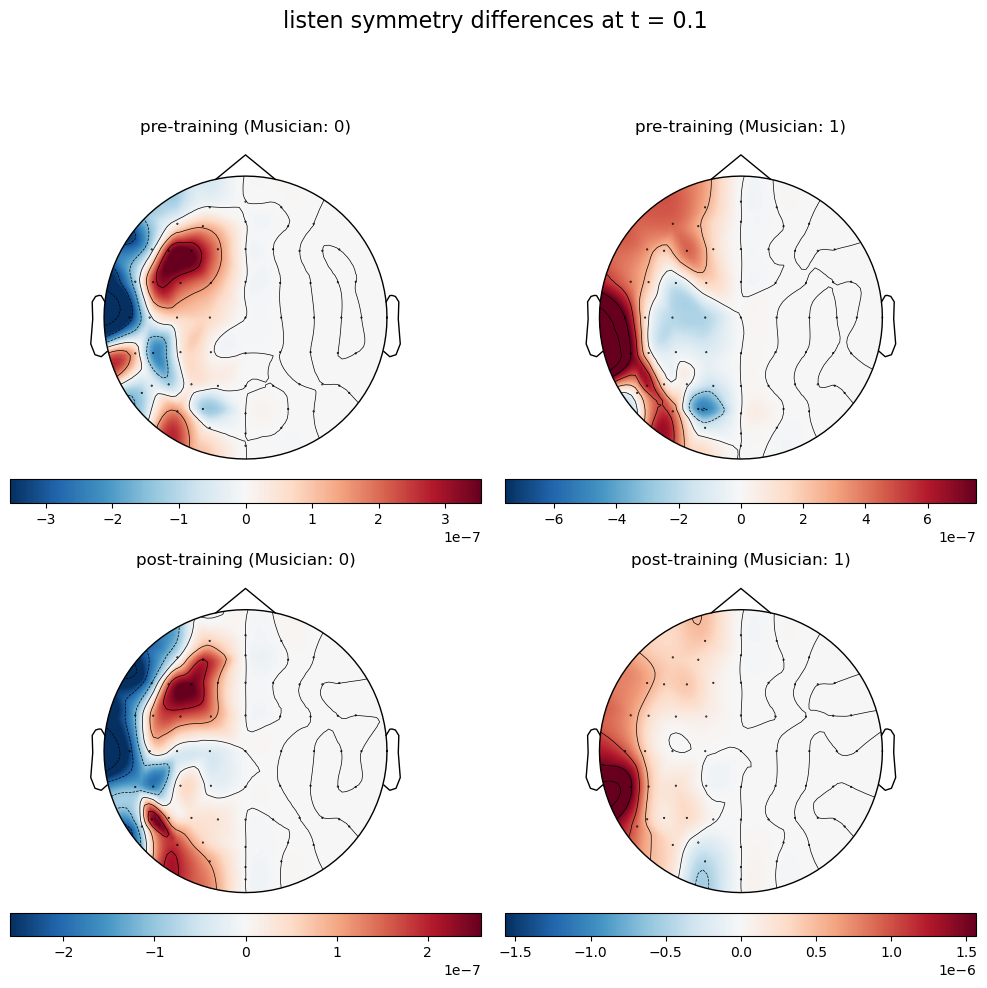

In [477]:
#plotting differences in symmetry where the right side is set to 0


# Parameters
timepoint = 0.1
time_toplot = time_index([timepoint])[0]

# Create a figure with subplots (2 rows and 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Adjust the size as necessary
fig.suptitle(f'{task} symmetry differences at t = {timepoint}', fontsize=16)

# Loop through periods and musicians
for i, (period, musician) in enumerate([(p, m) for p in ['pre', 'post'] for m in [0, 1]]):
    ep_sym_ave = np.mean(epochs_df[(epochs_df['period'] == period) & (epochs_df['musician'] == musician)]['epochs_diff'])
    
    # Check if ep_sym_ave is not empty and has the expected shape
    if ep_sym_ave.size > 0 and ep_sym_ave.shape[1] > time_toplot:
        # Use the corresponding axes
        ax = axes[i // 2, i % 2]  # Adjust the indexing for 2D array of axes

        # Plot the topomap on the current axis
        im, cn = mne.viz.plot_topomap(ep_sym_ave[:, time_toplot], pos=epochs_pre_listen_mus.info, axes=ax, show=False)
        
        # Title for each subplot
        ax.set_title(f'{period}-training (Musician: {musician})')
        
        # Optional: Add colorbar for the topomap
        plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)

# Show the final figure
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top to fit the main title
plt.show()


### Statistics on lateralization

1-sample t-test to see if symmetry is significantly different from 0

In [485]:
#preparing epochs arrays 
period = 'pre'
group = 'nonmusician'
if group == 'musician':   
    epochs_period = epochs_df[(epochs_df['period'] == period)&(epochs_df['musician']==1)]['epochs_diff']
elif group == 'nonmusician':   
    epochs_period = epochs_df[(epochs_df['period'] == period)&(epochs_df['musician']==0)]['epochs_diff']
epochs_arr = np.array(epochs_period.tolist()) #array of shape n_subjects, n_channels, n_timepoints

#statistics 
t_stat_list = []
p_value_list = []
for i in range(epochs_arr.shape[2]):
    t_stat, p_value = ttest_1samp(epochs_arr[:,:,i], axis = 0, popmean=0)
    t_stat_list.append(t_stat)
   
    #FDR correction
    fdr_p_value = fdrcorrection(p_value[ch_left_idx])[1] # gets the p values but not whether the hypothesis was rejected
    fdr_p_value = np.pad(fdr_p_value, pad_width=((0, 37)), constant_values = 1) #pad right hemisphere channels with 1s so that when it's inverted, it becomes 0
    p_value_list.append(fdr_p_value)
    
t_stat_list = np.array(t_stat_list).T
p_value_list = np.nan_to_num(np.array(p_value_list).T, nan = 1) #replace right hemisphere and center electrodes with 1s

#inverting p values so that smaller numbers are more red
p_value_list_inv = 1-p_value_list

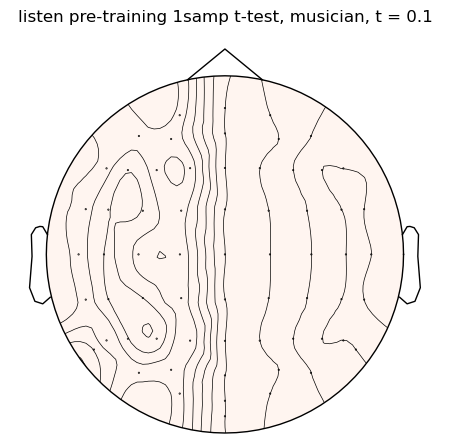

In [479]:
#static topomap of p values

time = 0.1
time_toplot = time_index([time])[0]

fig, axes = plt.subplots()  # Use plt.subplots() to create a figure and axes
axes.set_title(f'{task} {period}-training 1samp t-test, {group}, t = {timepoint}')
im, cn = mne.viz.plot_topomap(p_value_list_inv[:,time_toplot], pos=epochs_post_listen_mus.info, size=1, axes=axes, vlim = (0.95, 1))  # Pass the axes object to the plot_topomap function


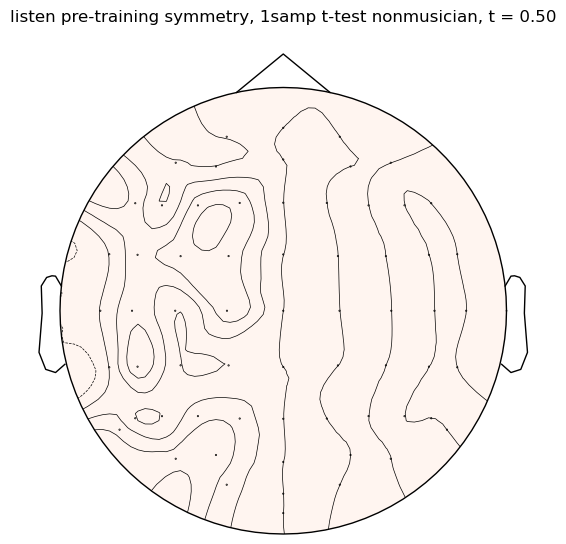

In [486]:
timepoints = np.arange(0, 91)
# Set up the figure and axes for the animation
fig, axes = plt.subplots(figsize=(8, 6))
axes.set_title(f'{period}-training symmetry difference, {group}')

# Function to update the topomap for each frame
def update(frame):
    axes.clear()  # Clear the axes for the new frame
    axes.set_title(f'{task} {period}-training symmetry, 1samp t-test {group}, t = {erp_times[frame]:.2f}')  # Update title
    im, cn = mne.viz.plot_topomap(p_value_list_inv[:, frame], 
                                   pos=epochs_post_listen_mus.info, 
                                   size=1, 
                                   axes=axes, 
                                   vlim=(0.95, 1), 
                                   show=False)  # Prevent showing during animation
    return im,

# Create animation
ani = FuncAnimation(fig, update, frames=timepoints, blit=False, repeat=True)

# Save the animation as an MP4 file
ani.save(f'p_value_1samp_sym_{task}_{group}_{period}.mp4', writer='ffmpeg', fps=10)

# Show the animation (optional)
plt.show()

Relative t-test to compare if the amount of asymmetry changed pre to post (or musician nonmusician)

In [483]:
comparison = "nmusprepost"
ep_1 = epochs_df.query("musician == 0 and period == 'pre'")['epochs_diff']
ep_2 = epochs_df.query("musician == 0 and period == 'post'")['epochs_diff']


#convert to arrays
ep_1 = np.array(ep_1.tolist())
ep_2 = np.array(ep_2.tolist())

#perform t-test 
t_stat_list = []
p_value_list = []
for i in range(ep_1.shape[2]): #iterate over the channels
    t_stat, p_value = ttest_rel(ep_1[:,:,i], ep_2[:,:,i], axis = 0)
    t_stat_list.append(t_stat)

    #FDR correction 
    fdr_p_value = fdrcorrection(p_value[ch_left_idx])[1] # gets the p values but not whether the hypothesis was rejected
    fdr_p_value = np.pad(fdr_p_value, pad_width=((0, 37)), constant_values = 1) #pad right hemisphere channels with 1s so that when it's inverted, it becomes 0
    p_value_list.append(fdr_p_value)
    
t_stat_list = np.array(t_stat_list).T
#p_value_list = np.nan_to_num(np.array(p_value_list).T, nan = 1) #replace right hemisphere and center electrodes with 1s
p_value_list = np.array(p_value_list).T

#inverting p values so that smaller numbers are more red
fdr_p_values_inv = 1-p_value_list

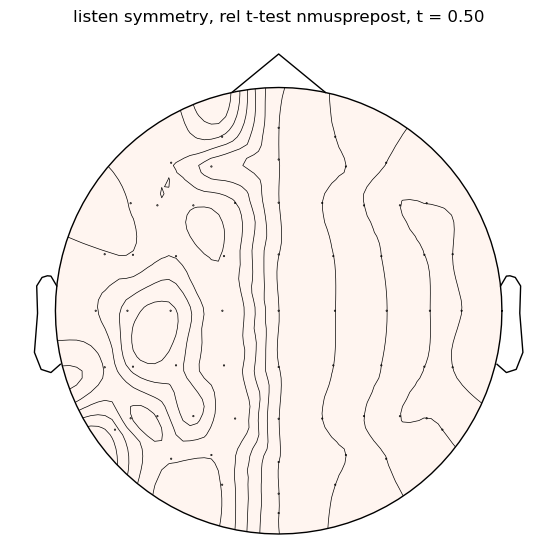

In [484]:
timepoints = np.arange(0, 91)
# Set up the figure and axes for the animation
fig, axes = plt.subplots(figsize=(8, 6))
axes.set_title(f'{period}-training symmetry difference, {group}')

# Function to update the topomap for each frame
def update(frame):
    axes.clear()  # Clear the axes for the new frame
    axes.set_title(f'{task} symmetry, rel t-test {comparison}, t = {erp_times[frame]:.2f}')  # Update title
    im, cn = mne.viz.plot_topomap(fdr_p_values_inv[:, frame], 
                                   pos=epochs_post_listen_mus.info, 
                                   size=1, 
                                   axes=axes, 
                                   vlim=(0.95, 1), 
                                   show=False)  # Prevent showing during animation
    return im,

# Create animation
ani = FuncAnimation(fig, update, frames=timepoints, blit=False, repeat=True)

# Save the animation as an MP4 file
ani.save(f'p_value_sym_{task}_{comparison}.mp4', writer='ffmpeg', fps=10)

# Show the animation (optional)
plt.show()